In [1]:
# Dependencies

from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Connect to the database
# Note: this assumes the fires database exists

rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')


### Get data

Note that we're leaving out days with no fires or very small fires

In [3]:
# Read data into a dataframe & take a look

data = pd.read_sql("select * from acres_and_air_data where size > 1", con=engine)
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,index,date,overall_aqi,site_name,year,size
0,0,2001-01-01,153,San Francisco,2001,1.5
1,3,2001-01-04,107,San Francisco,2001,9.8
2,4,2001-01-05,124,San Francisco,2001,146.0
3,5,2001-01-06,147,San Francisco,2001,5.5
4,6,2001-01-07,150,San Francisco,2001,10363.2


In [4]:
# Drop the unnecessary columns and sort by acres

data = data[['date', 'overall_aqi', 'size']]
data.columns = ["date", "air_quality", "acres_burned"]
data.head()

,date,air_quality,acres_burned
0,2001-01-01,153,1.5
1,2001-01-04,107,9.8
2,2001-01-05,124,146.0
3,2001-01-06,147,5.5
4,2001-01-07,150,10363.2


##### Spot-check a couple random values from our dataframe

pick a few random values from our dataframe

In [5]:
data.sort_values(by=['acres_burned'], inplace=True, ascending=False)


In [6]:
data.head()

,date,air_quality,acres_burned
2802,2012-10-22,37,315579.25
1669,2007-10-31,42,288438.30
680,2003-11-04,33,280059.30
3093,2013-10-24,56,255862.90
1612,2007-09-02,38,242862.84


##### Find the same values in the earlier data
find those same values from aqi_data and wildfire_data

In [7]:
temp = pd.read_sql("select * from aqi_data", con=engine)
temp.head()

,date,overall_aqi,site_name,year
0,2001-01-01,153,San Francisco,2001
1,2001-01-02,140,San Francisco,2001
2,2001-01-03,140,San Francisco,2001
3,2001-01-04,107,San Francisco,2001
4,2001-01-05,124,San Francisco,2001


In [8]:
temp[temp['date'] == '2012-10-22']

,date,overall_aqi,site_name,year
4309,2012-10-22,37,San Pablo,2012


In [9]:
wildfire = pd.read_sql("select * from wildfire_data", con=engine)

In [10]:
wildfire.head()

,index,fire_id,fire_name,discovery_date,containment_date,size,class,fire_year
0,0,0,FOUNTAIN,2005-02-02,2005-02-02,0.10,A,2005
1,1,1,PIGEON,2004-05-12,2004-05-12,0.25,A,2004
2,2,2,SLACK,2004-05-31,2004-05-31,0.10,A,2004
3,3,3,DEER,2004-06-28,2004-07-03,0.10,A,2004
4,4,4,STEVENOT,2004-06-28,2004-07-03,0.10,A,2004


In [11]:
wildfire[wildfire['containment_date'] == '2012-10-22']



,index,fire_id,fire_name,discovery_date,containment_date,size,class,fire_year
79650,79650,79650,MILE,2012-10-21,2012-10-22,0.20,A,2012
80132,80132,80132,PICNIC,2012-10-22,2012-10-22,0.25,A,2012
81174,81174,81174,RUSH,2012-08-12,2012-10-22,315578.80,G,2012


In [12]:
# Assign the data to X and y

X = data[["acres_burned"]]
y = data["air_quality"].values.reshape(-1,1)
print(X.shape, y.shape)

(3473, 1) (3473, 1)


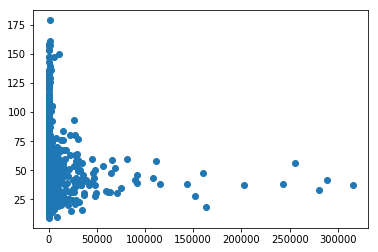

In [13]:
plt.scatter(X,y)

In [14]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [15]:
# Create the model using LinearRegression

model = LinearRegression()



In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.001248844173943664
Testing Score: -0.0024417196221024895
